<a href="https://colab.research.google.com/github/ShuHuiK/WIE3007_Group_Assignment/blob/yx/eda_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/ShuHuiK/WIE3007_Group_Assignment/main/data/2025_Sterling_Financial_Dataset_clean.csv"
df = pd.read_csv(url)

df.head()

,date,customer_id,location,business_sector,age,income,credit_score,savings_ratio,loan_amount,debt_to_income,credit_utilization,payment_punctuality,customer_feedback,default_history,sentiment,risk_category,customer_segment,feedback_topic
0,2025-04-15,CUST-2025000,"Iowa, US",Real Estate,39,93096.98,782,0.058,2692.74,0.133,0.93,91.49,Standard banking,0,Neutral,Medium Risk,Mass Market,General Service
1,2025-10-22,CUST-2025001,"Oklahoma, US",Retail,38,25000.00,716,0.042,43350.56,0.187,0.75,85.26,Neutral: No feedback provided.,0,Neutral,Medium Risk,Mass Market,Financial/Pricing
2,2025-02-26,CUST-2025002,"Utah, US",Services,34,42377.97,657,0.193,5856.85,0.103,0.62,84.18,Process was slow,0,Negative,Medium Risk,Mass Market,Digital/Operations
3,2025-02-26,CUST-2025003,"Missouri, US",Manufacturing,44,27556.02,606,0.136,17789.75,0.091,0.62,88.10,Excellent rates,0,Positive,Medium Risk,Mass Market,Financial/Pricing
4,2025-09-15,CUST-2025004,"South Carolina, US",Retail,49,25000.00,578,0.010,70266.78,0.229,0.90,85.24,Quick approval,0,Positive,High Risk,Mass Market,Digital/Operations


## Data Quality Checks and Preprocessing

In [6]:
df.shape

(1500, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1500 non-null   object 
 1   customer_id          1500 non-null   object 
 2   location             1500 non-null   object 
 3   business_sector      1500 non-null   object 
 4   age                  1500 non-null   int64  
 5   income               1500 non-null   float64
 6   credit_score         1500 non-null   int64  
 7   savings_ratio        1500 non-null   float64
 8   loan_amount          1500 non-null   float64
 9   debt_to_income       1500 non-null   float64
 10  credit_utilization   1500 non-null   float64
 11  payment_punctuality  1500 non-null   float64
 12  customer_feedback    1500 non-null   object 
 13  default_history      1500 non-null   int64  
 14  sentiment            1500 non-null   object 
 15  risk_category        1500 non-null   o

Missing Values

In [8]:
df.isnull().sum()

,0
date,0
customer_id,0
location,0
business_sector,0
age,0
income,0
credit_score,0
savings_ratio,0
loan_amount,0
debt_to_income,0


No missing values are detected across all variables, indicating the dataset is complete for analysis.

Duplicate Records

In [9]:
df.duplicated().sum()

np.int64(0)

No duplicate records are found in the dataset.

Data Type Conversion

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

The 'date' column is converted from object to datetime format to ensure proper temporal handling and enable time-based analysis if required.

## Exploratory Data Analysis (EDA)

### Summary Statistics

In [18]:
df.describe()

,date,age,income,credit_score,savings_ratio,loan_amount,debt_to_income,credit_utilization,payment_punctuality,default_history
count,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000
mean,2025-07-02 12:00:57.600000256,42.075333,72400.777247,680.462000,0.119035,43335.631307,0.145114,0.45852,87.329040,0.061333
min,2025-01-01 00:00:00,18.000000,25000.000000,432.000000,0.010000,11.360000,0.001000,0.08000,78.500000,0.000000
25%,2025-03-30 18:00:00,34.000000,47487.747500,630.000000,0.066000,12924.880000,0.078000,0.28000,83.577500,0.000000
50%,2025-07-05 00:00:00,42.000000,65623.445000,683.000000,0.115000,29369.940000,0.129500,0.43000,87.240000,0.000000
75%,2025-10-07 00:00:00,50.000000,90728.210000,731.000000,0.167250,61695.832500,0.195000,0.62000,91.030000,0.000000
max,2025-12-27 00:00:00,75.000000,300000.000000,850.000000,0.321000,263710.790000,0.530000,0.99000,96.500000,1.000000
std,NaN,11.452151,34185.343166,71.043893,0.068981,41835.443921,0.089134,0.22347,4.426966,0.240021


In [19]:
df[['income', 'credit_score', 'debt_to_income', 'credit_utilization']].describe()

,income,credit_score,debt_to_income,credit_utilization
count,1500.000000,1500.000000,1500.000000,1500.00000
mean,72400.777247,680.462000,0.145114,0.45852
std,34185.343166,71.043893,0.089134,0.22347
min,25000.000000,432.000000,0.001000,0.08000
25%,47487.747500,630.000000,0.078000,0.28000
50%,65623.445000,683.000000,0.129500,0.43000
75%,90728.210000,731.000000,0.195000,0.62000
max,300000.000000,850.000000,0.530000,0.99000


Summary statistics indicate that the dataset contains realistic financial characteristics. The average customer is approximately 42 years old with a mean income of around 72,000 and a mean credit score of 680, suggesting a predominantly **medium-risk customer base**. Financial variables such as income and loan amount exhibit right-skewed distributions due to the presence of high-value customers. The default rate is approximately 6%, highlighting class imbalance and reinforcing the need for evaluation metrics beyond accuracy. Overall, the ranges and distributions of key variables are consistent with real-world retail banking data.

### Numerical Feature

Income Distribution

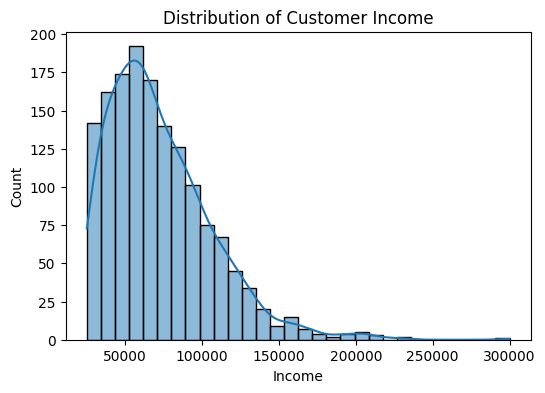

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['income'], bins=30, kde=True)
plt.title("Distribution of Customer Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

Customer income is right-skewed, indicating a larger proportion of middle-income customers with fewer high-income individuals, which is typical in retail banking datasets.

Credit Score Distribution

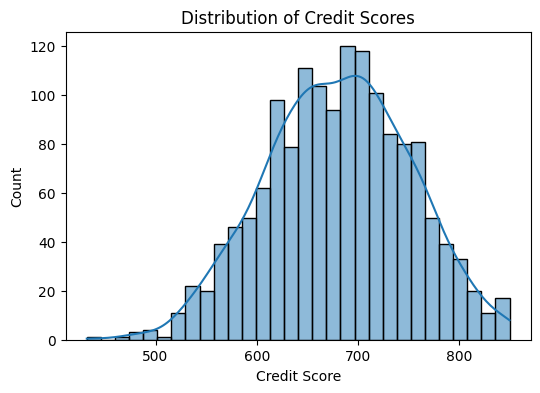

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['credit_score'], bins=30, kde=True)
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

Most customers have credit scores within the mid to high range, suggesting a generally credit-worthy customer base.

Debit-to-Income Ratio

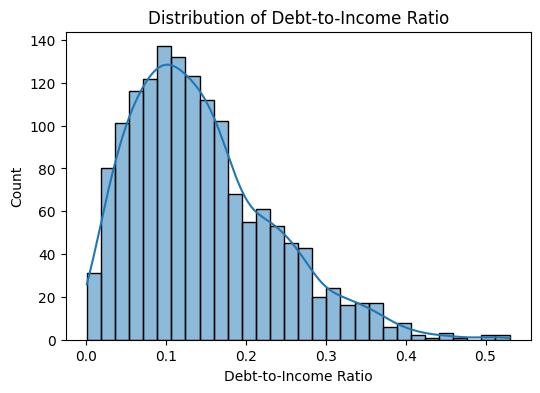

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df['debt_to_income'], bins=30, kde=True)
plt.title("Distribution of Debt-to-Income Ratio")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Count")
plt.show()

The majority of customers exhibit relatively low debt-to-income ratios, indicating manageable debt levels across the dataset.

### Categorical Features

Business Sector

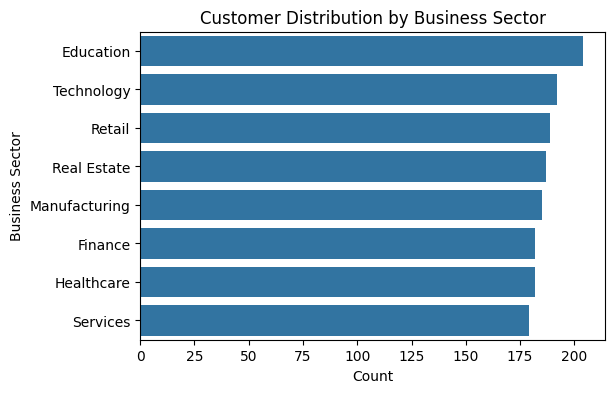

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(y=df['business_sector'], order=df['business_sector'].value_counts().index)
plt.title("Customer Distribution by Business Sector")
plt.xlabel("Count")
plt.ylabel("Business Sector")
plt.show()

Customers are relatively evenly distributed across business sectors, indicating that the simulated dataset does not overly concentrate on a single industry. This balanced representation supports fair model training without sector-specific bias.

Risk Category

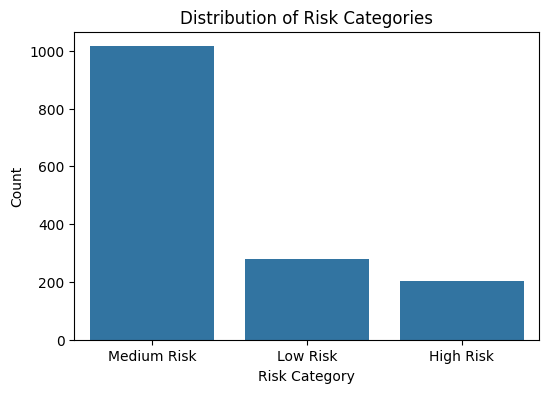

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['risk_category'], order=df['risk_category'].value_counts().index)
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

The risk categories are not evenly distributed, with the majority of customers classified as Medium Risk. This reflects a realistic banking scenario where most customers fall within moderate risk profiles, while fewer customers are classified as low or high risk.

This imbalance may influence predictive modelling and will be considered during evaluation using metrics such as F1-score and ROC-AUC.

Default History

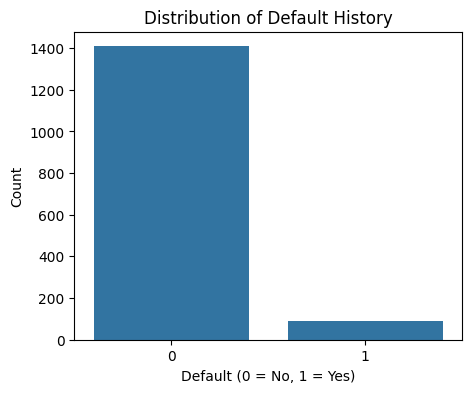

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['default_history'])
plt.title("Distribution of Default History")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The `default_history` variable represents whether a customer has previously defaulted on a loan, where 0 indicates non-default and 1 indicates default. The distribution shows that non-default cases dominate the dataset, reflecting a realistic credit risk scenario where defaults are relatively rare.

This class imbalance reinforces the need to evaluate models using metrics such as F1-score and ROC-AUC in addition to accuracy.